# Trying gradient boosting algorithm

In [17]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

# Helper function to split our data
from sklearn.model_selection import train_test_split, GridSearchCV

# Helper fuctions to evaluate our model.
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Import the trees from sklearn
from sklearn import tree

# Helper functions to visualize our trees
from sklearn.tree import plot_tree, export_text

#tree regression
from sklearn.ensemble import RandomForestRegressor
# imbalanced-learn library
from imblearn.over_sampling import RandomOverSampler

from sklearn.tree import plot_tree, export_text
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [34]:
df = pd.read_csv('../old_dataset/encoded_dataset_nov_17.csv')
df = df[df['Outcome Type'] == 'ADOPTION']
df.head(5)

,Type,Breed,Color,Sex,Size,Animal ID,Intake Date,Outcome Date,Days in Shelter,Intake Type,Outcome Type,Intake Condition,Outcome Condition,Age,Color_encoded,Sex_encoded,Intake Condition_encoded,Intake Type_encoded,Breed_encoded,Size_encoded
1,CAT,DOMESTIC SH,ORG TABBY/WHITE,Spayed,KITTN,A417889,05/30/2023,08/08/2023,70,STRAY,ADOPTION,UNKNOWN,HEALTHY,0,22,3,3,5,13,0
2,CAT,DOMESTIC SH,BLACK,Neutered,KITTN,A418221,06/13/2023,08/08/2023,56,STRAY,ADOPTION,UNKNOWN,HEALTHY,0,0,2,3,5,13,0
3,CAT,SIAMESE/MIX,LYNX PT,Neutered,KITTN,A420264,09/12/2023,09/30/2023,18,OWNER SURRENDER,ADOPTION,HEALTHY,HEALTHY,0,18,2,0,3,34,0
4,CAT,DOMESTIC SH,BLACK,Neutered,KITTN,A419416,08/01/2023,09/30/2023,60,STRAY,ADOPTION,UNKNOWN,HEALTHY,0,0,2,3,5,13,0
5,CAT,DOMESTIC SH,BRN TABBY/WHITE,Spayed,KITTN,A419414,09/12/2023,09/30/2023,18,STRAY,ADOPTION,HEALTHY,HEALTHY,0,8,3,0,5,13,0


In [35]:
df.shape

(3647, 20)

## ⬇︎⬇︎ GradientBoostingRegressor simple  ⬇︎⬇︎

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Select relevant columns
selected_columns = ['Color_encoded', 'Intake Condition_encoded', 'Intake Type_encoded',
                    'Age','Size_encoded', 'Breed_encoded','Days in Shelter']
df_selected = df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Split the data into features (X) and target variable (y)
X = df_selected.drop('Days in Shelter', axis=1)
y = df_selected['Days in Shelter']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = gb_model.predict(X_test)
predictions = np.round(predictions)
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)  # Calculate RMSE
print(f'Root Mean Squared Error: {rmse}')

average_days_staying = y_test.mean()
print(f'Average Days Staying: {average_days_staying}')

if rmse < average_days_staying:
    print("RMSE is less than Average Days Staying.")
else:
    print("RMSE is greater than or equal to Average Days Staying.")
    
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_true=y_test, y_pred=predictions)
print("R-squared Score: %f" % r2)

Mean Squared Error: 471.8205479452055
Root Mean Squared Error: 21.721430614607442
Average Days Staying: 30.801369863013697
RMSE is less than Average Days Staying.
Mean Absolute Error: 14.382191780821918
R-squared Score: 0.252885


In [37]:
# Calculate residuals
residuals = y_test - predictions

# Add residuals to the DataFrame for further analysis if needed
df_residuals = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'Residuals': residuals})

# Display the DataFrame with residuals
# print(df_residuals)

df_residuals.head(50)

,Actual,Predicted,Residuals
518,7,27.0,-20.0
3792,55,50.0,5.0
4146,18,39.0,-21.0
360,5,13.0,-8.0
2424,36,31.0,5.0
4496,26,28.0,-2.0
36,10,28.0,-18.0
3706,9,30.0,-21.0
3392,34,27.0,7.0
3751,18,47.0,-29.0


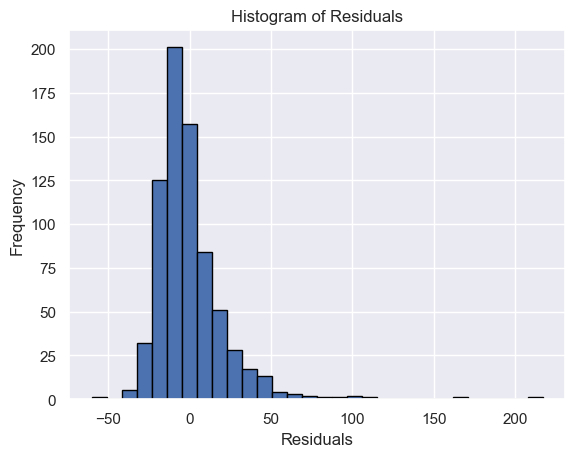

Average of Residuals: -0.20136986301369864
Average of Absolute Residuals: 14.382191780821918


In [38]:
import matplotlib.pyplot as plt

# ... (previous code)

# Calculate residuals
residuals = y_test - predictions

# Plot histogram of residuals
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Calculate and print the average of residuals
average_residuals = residuals.mean()
print(f'Average of Residuals: {average_residuals}')


# Calculate absolute residuals
absolute_residuals = np.abs(residuals)

# Calculate and print the average of absolute residuals
average_absolute_residuals = absolute_residuals.mean()
print(f'Average of Absolute Residuals: {average_absolute_residuals}')



In [39]:
# Assuming df_residuals_sorted is your sorted DataFrame with 'Residuals' column
zero_residuals = df_residuals_sorted[df_residuals_sorted['Residuals'] == 0]

# Display the rows where residuals are exactly 0
zero_residuals.head(50)

,Actual,Predicted,Residuals
959,32,32.0,0.0
625,13,13.0,0.0
486,13,13.0,0.0
1470,15,15.0,0.0
61,32,32.0,0.0
4598,13,13.0,0.0
1327,46,46.0,0.0
2140,17,17.0,0.0
3568,47,47.0,0.0
3514,26,26.0,0.0


## ⬆︎⬆︎ GradientBoostingRegressor simple (R2 : 0.252025)  ⬆︎⬆︎

## ⬇︎⬇︎ GradientBoostingRegressor with GridSearchCV  ⬇︎⬇︎

In [25]:

# Assuming df is your dataframe
selected_columns = ['Color_encoded', 'Intake Condition_encoded', 'Intake Type_encoded',
                    'Age', 'Size_encoded', 'Breed_encoded', 'Days in Shelter', 'Sex_encoded']
df_selected = df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Split the data into features (X) and target variable (y)
X = df_selected.drop('Days in Shelter', axis=1)
y = df_selected['Days in Shelter']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # # Use RandomOverSampler to handle imbalanced data
# ros = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
gb_model = grid_search.best_estimator_

# Now let's evaluate our model on the test set
y_pred = np.round(gb_model.predict(X_test))

# Evaluate the regression model
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
print("Mean Squared Error: %f" % mse)

rmse = np.sqrt(mse)  # Calculate RMSE
print(f'Root Mean Squared Error: {rmse}')

average_days_staying = y_test.mean()
print(f'Average Days Staying: {average_days_staying}')

# if rmse < average_days_staying:
#     print("RMSE is less than Average Days Staying.")
# else:
#     print("RMSE is greater than or equal to Average Days Staying.")
    
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared Score: %f" % r2)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Mean Squared Error: 511.245205
Root Mean Squared Error: 22.61073208632246
Average Days Staying: 30.801369863013697
Mean Absolute Error: 14.382191780821918
R-squared Score: 0.190457


In [26]:
feature_importance = pd.Series(gb_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

Age                         0.311763
Color_encoded               0.238071
Intake Condition_encoded    0.203662
Intake Type_encoded         0.105144
Size_encoded                0.063546
Breed_encoded               0.041528
Sex_encoded                 0.036286
dtype: float64


In [29]:
rmse = np.sqrt(mse)  # Calculate RMSE
print(f'Root Mean Squared Error: {rmse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate residuals
residuals = y_test - predictions

# Add residuals to the DataFrame for further analysis if needed
df_residuals = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'Residuals': residuals})

# Display the DataFrame with residuals
# print(df_residuals)

df_residuals.head(50)

Root Mean Squared Error: 22.61073208632246
Mean Absolute Error: 14.576712328767123


,Actual,Predicted,Residuals
518,7,27.0,-20.0
3792,55,50.0,5.0
4146,18,39.0,-21.0
360,5,13.0,-8.0
2424,36,31.0,5.0
4496,26,28.0,-2.0
36,10,28.0,-18.0
3706,9,30.0,-21.0
3392,34,27.0,7.0
3751,18,47.0,-29.0


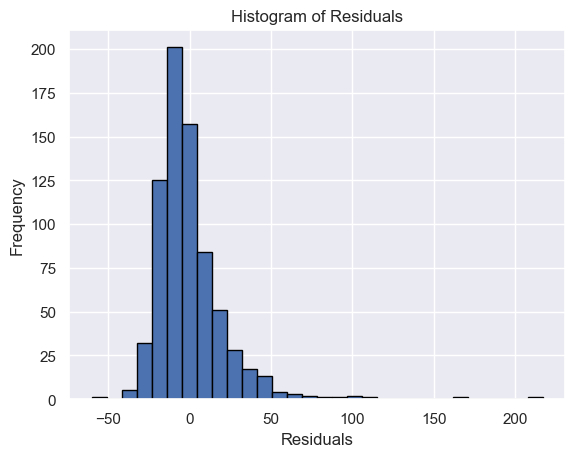

Average of Residuals: -0.20136986301369864
Average of Absolute Residuals: 14.382191780821918


In [30]:
import matplotlib.pyplot as plt

# ... (previous code)

# Calculate residuals
residuals = y_test - predictions

# Plot histogram of residuals
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Calculate and print the average of residuals
average_residuals = residuals.mean()
print(f'Average of Residuals: {average_residuals}')


# Calculate absolute residuals
absolute_residuals = np.abs(residuals)

# Calculate and print the average of absolute residuals
average_absolute_residuals = absolute_residuals.mean()
print(f'Average of Absolute Residuals: {average_absolute_residuals}')



In [33]:
# Assuming df_residuals_sorted is your sorted DataFrame with 'Residuals' column
zero_residuals = df_residuals_sorted[df_residuals_sorted['Residuals'] == 0]

# Display the rows where residuals are exactly 0
zero_residuals.head(50)

,Actual,Predicted,Residuals
959,32,32.0,0.0
625,13,13.0,0.0
486,13,13.0,0.0
1470,15,15.0,0.0
61,32,32.0,0.0
4598,13,13.0,0.0
1327,46,46.0,0.0
2140,17,17.0,0.0
3568,47,47.0,0.0
3514,26,26.0,0.0


## ⬆︎⬆︎ GradientBoostingRegressor w GridSearchCV (R2 : )  ⬆︎⬆︎

## ⬇︎⬇︎ RandomForestRegressor no-sampling  ⬇︎⬇︎

In [7]:
independent_variables = ['Color_encoded', 'Intake Condition_encoded', 'Intake Type_encoded',
                    'Age']

dependent_variable = 'Days in Shelter'

In [8]:
independent_variables = ['Color_encoded', 'Intake Condition_encoded', 'Intake Type_encoded',
                    'Age','Size_encoded', 'Breed_encoded', 'Sex_encoded']
dependent_variable = 'Days in Shelter'

In [9]:

# Specify the column containing the values you want to check for uniqueness

X = df[independent_variables]
y = df[dependent_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
best_model = grid_search.best_estimator_

# Now let's evaluate our model on the test set
y_pred = np.round(best_model.predict(X_test)) # 80, 80.2 (80) 81

# Evaluate the regression model
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
print("Mean Squared Error: %f" % mse)

r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared Score: %f" % r2)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error: 678.632877
R-squared Score: 0.209533


In [10]:
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

Age                         0.294602
Intake Condition_encoded    0.268760
Color_encoded               0.189252
Intake Type_encoded         0.115533
Size_encoded                0.050889
Sex_encoded                 0.046811
Breed_encoded               0.034153
dtype: float64


## ⬆︎⬆︎ RandomForestRegressor w GridSearchCV (R2 : )  ⬆︎⬆︎

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(regression_forest_model.estimators_[0], feature_names=independent_variables, filled=True)
plt.title('Tree 1')
plt.show()

In [ ]:
y_pred

In [ ]:
print(y_test.tolist())

In [ ]:
# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the DataFrame
print(comparison_df)

# # You can also save the DataFrame to a CSV file if you want to analyze it further
# comparison_df.to_csv('comparison_results.csv', index=False)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the entire DataFrame
print(comparison_df)
